C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\supratik chanda\Documents\New folder (2)\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


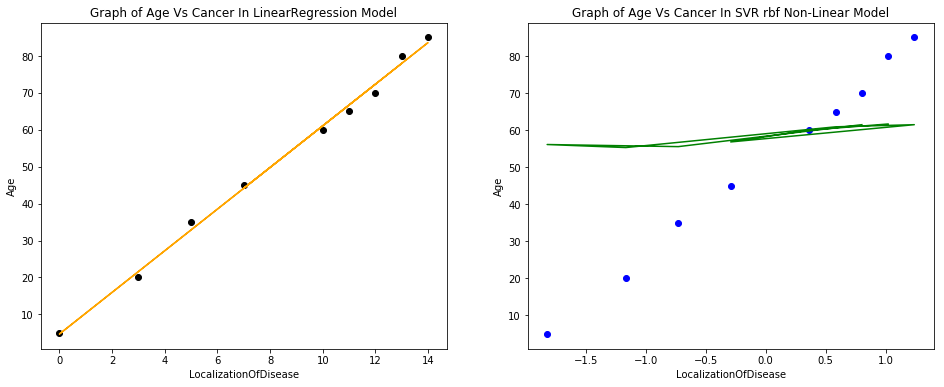

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
imp=Imputer(missing_values='NaN', strategy='mean',axis=0)
lbl= LabelEncoder()
oneHot = OneHotEncoder(categorical_features = [0])
reg=LinearRegression()
sc=StandardScaler()
svr= SVR(kernel='rbf')
from sklearn.metrics import r2_score
dt =pd.read_csv("Skin_Cancer.csv")
dt.drop_duplicates (inplace=True)    #Dropping the duplicate values from the dataframe to avoid nose and possiblity of overfitting
#print(dt.shape,(type(dt)))
LocalX =dt.iloc[:,0:1].values  # X axis is for Localization as it is an independent variable
#print(LocalX.shape)
AgeY = dt.iloc[:,1:2].values      # Y axis is for Age as it is a dependent variable
LocalX[:,0]=lbl.fit_transform(LocalX[:,0])
t=LocalX[LocalX[:,0].argsort()]#sorting ascending order of a specific column in a numpy array
X_train,X_test,Y_train,Y_test = train_test_split(t,AgeY,test_size=0.4,random_state=0)
reg.fit(X_train,Y_train)
#print(Y_test,reg.predict(X_test))
#print(r2_score(Y_test,reg.predict(X_test))) # accuracy Level without Standard Scaler
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(X_train,Y_train,color="Black")
plt.plot(X_train,reg.predict(X_train),color="Orange")
plt.title("Graph of Age Vs Cancer In LinearRegression Model")
plt.xlabel("LocalizationOfDisease")
plt.ylabel("Age")
#plt.show()
X_train=sc.fit_transform(X_train)
reg.fit(X_train,Y_train)
#print(r2_score(Y_train,reg.predict(X_train)))# accuracy Level with Standard Scaler
svr.fit(sc.fit_transform(X_train),Y_train)
#print(r2_score(Y_test,svr.predict(sc.transform(X_test))))
plt.subplot(1,2,2)
plt.scatter(X_train,Y_train,color="Blue")
plt.plot(X_train,svr.predict(X_train),color="Green")
plt.title("Graph of Age Vs Cancer In SVR rbf Non-Linear Model")
plt.xlabel("LocalizationOfDisease")
plt.ylabel("Age")
plt.show()